In [362]:
# Importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [363]:
#Downloading Dataset

!gdown 1vn3RfMPwEDUuljcarZDv1o805qQ9UdUB

Downloading...
From: https://drive.google.com/uc?id=1vn3RfMPwEDUuljcarZDv1o805qQ9UdUB
To: /content/shopping.csv
100% 1.07M/1.07M [00:00<00:00, 71.5MB/s]


In [364]:
df = pd.read_csv("shopping.csv") # Assigning Dataset

In [365]:
df.head() # Read Dataset


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Analysing Dataset

In [366]:
df.info() # Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [367]:
np.any(df.duplicated()) # Finding duplicate values

True

In [368]:
df = df.drop_duplicates()   # Dropping duplicates values

In [369]:
df.nunique()  # Unique values in each colummns

,0
Administrative,27
Administrative_Duration,3335
Informational,17
Informational_Duration,1258
ProductRelated,311
ProductRelated_Duration,9551
BounceRates,1872
ExitRates,4777
PageValues,2704
SpecialDay,6


In [370]:
df.columns  # dataset columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [371]:
cat_col = ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

for i in cat_col:
  print(f"Unique values in {i:<15} : {df[i].unique()}")
  print()

Unique values in SpecialDay      : [0.  0.4 0.8 1.  0.2 0.6]

Unique values in Month           : ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']

Unique values in OperatingSystems : [1 2 4 3 7 6 8 5]

Unique values in Browser         : [ 1  2  3  4  5  6  7 10  8  9 12 13 11]

Unique values in Region          : [1 9 2 3 4 5 6 7 8]

Unique values in TrafficType     : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]

Unique values in VisitorType     : ['Returning_Visitor' 'New_Visitor' 'Other']

Unique values in Weekend         : [False  True]



Insights:
1. SpecialDay:

  * Contains 6 unique values, representing different degrees of proximity to special days.
  * Ranges from 0.0 (no special day influence) to 1.0 (closest to a special day).
2. Month:

  * Includes 10 unique values, corresponding to the months when the sessions took place (No information for Jan and Apr).
  * The data spans from February to December.
3. OperatingSystems:

  * 8 unique values representing different operating systems that users were using during their sessions.
4. Browser:

  * 13 unique values, indicating a variety of browsers used by users, from popular ones to less common ones.
5. Region:

  * Contains 9 unique regions, suggesting a geographical segmentation of user activity across different areas.
6. TrafficType:

  * With 20 unique values, this feature reflects the diverse types of traffic sources driving users to the site.
7. VisitorType:

  * 3 unique categories: Returning Visitor, New Visitor, and Other. This shows the visitor's engagement type.
8. Weekend:

  * A boolean field, showing whether the session occurred on a weekend (True or False).

# Dataset Preprocessing

In [372]:
for i in cat_col:
  df[i] = df[i].astype("category")

In [373]:
df["Revenue"].value_counts()

,count
Revenue,
False,10297
True,1908


In [374]:
df["Revenue"] = df["Revenue"].apply(lambda x : np.where(x==False, 0, 1)).astype(int)  # Convert datatype of Revenue

In [375]:
df["Revenue"].unique()

array([0, 1])

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12205 non-null  int64   
 1   Administrative_Duration  12205 non-null  float64 
 2   Informational            12205 non-null  int64   
 3   Informational_Duration   12205 non-null  float64 
 4   ProductRelated           12205 non-null  int64   
 5   ProductRelated_Duration  12205 non-null  float64 
 6   BounceRates              12205 non-null  float64 
 7   ExitRates                12205 non-null  float64 
 8   PageValues               12205 non-null  float64 
 9   SpecialDay               12205 non-null  category
 10  Month                    12205 non-null  category
 11  OperatingSystems         12205 non-null  category
 12  Browser                  12205 non-null  category
 13  Region                   12205 non-null  category
 14  TrafficType

# Statistical Summary

In [377]:
df.describe().T   #

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
BounceRates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
ExitRates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
PageValues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
Revenue,12205.0,0.156329,0.363182,0.0,0.000000,0.000000,0.000000,1.000000


Insights:

1. Administrative & Administrative Duration:

  * Users visited an average of 2.34 administrative pages per session, but this varies significantly (standard deviation of 3.33), with a maximum of 27 pages.
  * Time spent on these pages averages 81.65 seconds, but there's a wide range, with a maximum duration of about 56 minutes (3,398.75 seconds).
2. Informational & Informational Duration:

  * Informational pages are visited less frequently, with an average of 0.51 pages per session and a maximum of 24 pages.
  * Time spent is relatively low, averaging 34.83 seconds but also having a large range, with a maximum of 42 minutes (2,549.38 seconds).
3. Product-Related & Product-Related Duration:

  * Product-related pages have the highest interaction, with an average of 32 pages per session, but some sessions reached as high as 705 pages.
  * The average time spent on product-related pages is about 1,207 seconds (20 minutes), but some sessions extend to 17+ hours (63,973.52 seconds).
4. Bounce Rates & Exit Rates:

  * Bounce rates are low, with an average of 2.04% of users leaving without interaction after visiting the first page.
  * Exit rates show an average of 4.15%, indicating the likelihood of a page being the last one viewed.
  * These values also vary but have a maximum of 20%, showing some pages with high exit behavior.
5. Page Values:

  * The average value of a page is 5.95, but most sessions have 0 page value (50% and 75% quartiles).
  * The maximum page value reaches 361.76, which could be from a session leading to a high-value transaction.
6. Revenue:
  * 15.6% of sessions result in a purchase.
  * 84.4% of sessions do not generate revenue.
  * The distribution of Revenue is highly skewed towards non-purchasing sessions.

In [378]:
df.describe(include = 'category')

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
count,12205.0,12205,12205,12205,12205,12205,12205,12205
unique,6.0,10,8,13,9,20,3,2
top,0.0,May,2,2,1,2,Returning_Visitor,False
freq,10956.0,3329,6541,7883,4714,3911,10431,9346


Insights:
1. Special Days:
  * The majority of data entries are from non-special days. Only a small portion of visits are on special days.

2. Month Distribution:
  * May is the most common month in your data, indicating it might be a peak period or simply overrepresented in your sample.

3.  Operating Systems:
  * The most common operating system (value 2) is used by the majority of visitors. There is some diversity, but one system dominates.

4.  Browsers:
  * The most frequent browser is represented by the value 2. While multiple browsers are used, a few dominate the user base.

5.  Region:
  * The most common region (1) has the highest frequency, suggesting a concentration of users from that region.

6.  Traffic Type:
  * The dominant traffic type (2) indicates a specific traffic source is more prevalent in your dataset.

7.  Visitor Type:
  * The majority of users are returning visitors, which suggests a high level of user retention or repeat visits.

8.  Weekend Visits:
  * Most visits are during weekdays (when Weekend is False), indicating that your traffic is generally higher on non-weekend days.

# Outlier Treatment

In [379]:
# Calculate outlier percentage

col_name = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated',
              'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']] # selecting numerical columns


def calculate_outlier_percentage(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  outlier_percentage = round(len(outliers)/ len(df) * 100,2)

  return outlier_percentage

for col in col_name:
  outlier_percentages = calculate_outlier_percentage(df, col)

  print(f"Outlier percentage of {col:<25} : {outlier_percentages}")


Outlier percentage of Administrative            : 3.31
Outlier percentage of Administrative_Duration   : 9.41
Outlier percentage of Informational             : 21.56
Outlier percentage of Informational_Duration    : 19.71
Outlier percentage of ProductRelated            : 8.25
Outlier percentage of ProductRelated_Duration   : 7.79
Outlier percentage of BounceRates               : 11.7
Outlier percentage of ExitRates                 : 10.86
Outlier percentage of PageValues                : 22.37


  * Percentage od outliers is high and hence we are not performing outlier treatment to keep the originality of dataset.

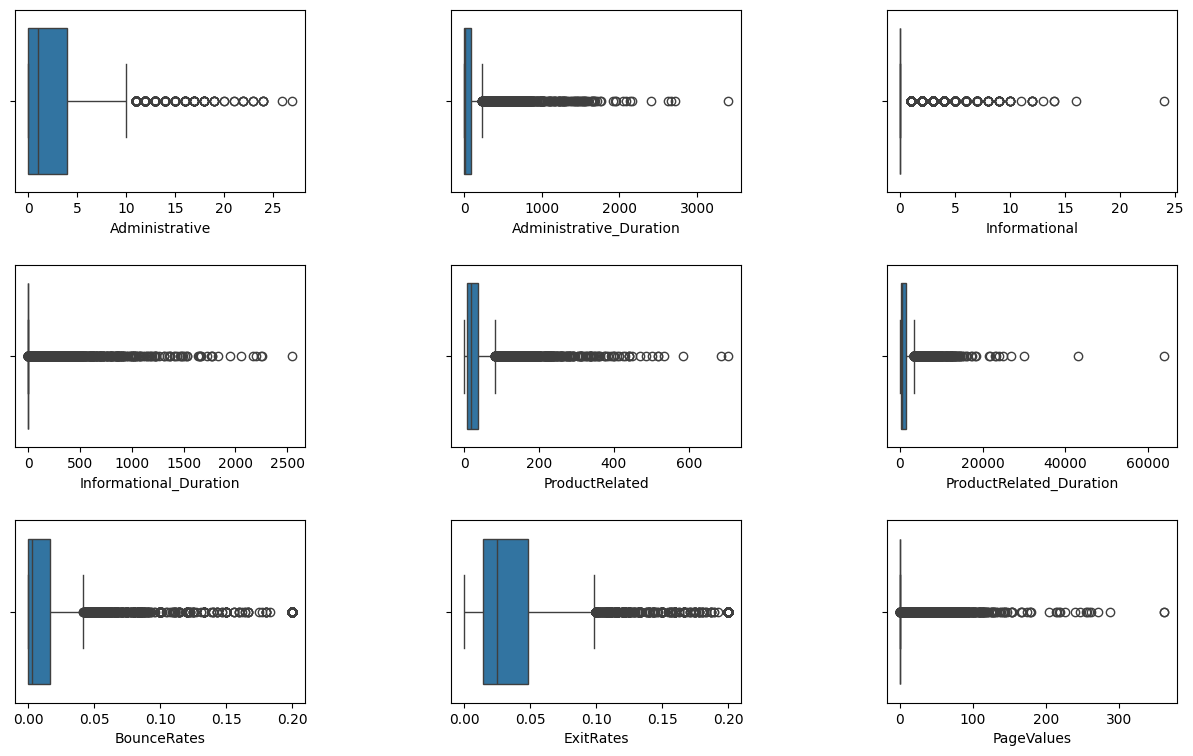

In [380]:
plt.figure(figsize = (15,9))  # Define figure size

grid = plt.GridSpec(3,3, wspace = 0.5, hspace = 0.4)  #specify rows and columns

for i, col in enumerate(col_name):   # visualize graphs
  ax = plt.subplot(grid[i])  # Use GridSpec for subplot positioning
  sns.boxplot(x = df[col], ax = ax)

Insights:
1. Administrative & Administrative_Duration:

  * Outliers are present for both metrics, with several sessions having unusually high page visits or durations.
  * The bulk of the data lies within the interquartile range (IQR), confirming that most sessions involve minimal engagement with administrative pages.
2. Informational & Informational_Duration:

  * A large number of outliers are visible, particularly for the duration.
  * This indicates that while the typical session doesn't involve informational pages, some sessions heavily rely on them, leading to longer durations.
3. ProductRelated & ProductRelated_Duration:
  * Significant number of outliers in both variables. The higher page visits and durations, compared to other categories, suggest a broader variance in user interaction with product-related pages.
4. BounceRates & ExitRates:

  * Outliers are present, but these metrics mostly cluster toward lower values.
  * There are some sessions with extreme exit and bounce rates, which could indicate unsuccessful user sessions.
5. PageValues:

  * Numerous outliers indicate that while most sessions have low or zero page values, there are a few high-value sessions that stand out.
  * The IQR is small, reinforcing that the majority of sessions contribute little value.


# Univariate Analysis

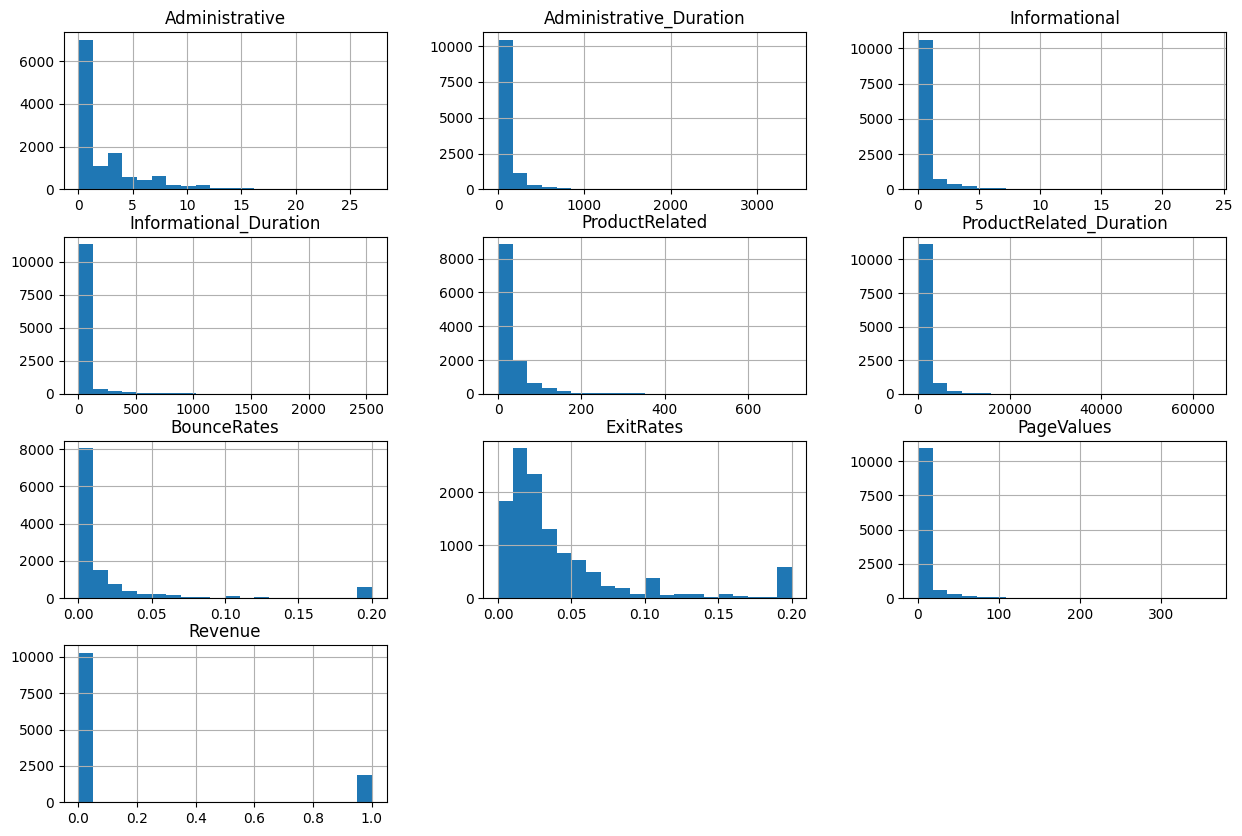

In [381]:
df.hist(figsize=(15, 10), bins=20)   # Plotting histograms for each numerical feature
plt.show()

Insights:
1. Administrative & Administrative_Duration:

  * Most sessions involve a low number of administrative page visits and a short duration.
  * A few sessions have significantly more page visits and longer durations, but these are rare.
  * Skewed heavily to the left, indicating that the majority of users engage minimally with administrative pages.
2. Informational & Informational_Duration:

  * Similar to administrative data, most users have minimal interaction with informational pages, with a sharp decline in the number of users as the page count or duration increases.
  * The distribution is highly skewed, suggesting most sessions involve little to no use of informational pages.
3. ProductRelated & ProductRelated_Duration:

  * The highest number of sessions involves 0-100 product-related pages, but the number drops off gradually as the page count increases.
  * Product-related pages and durations are more dispersed compared to the other categories, with a wider range of session lengths.
4. BounceRates & ExitRates:

  * Most sessions have low bounce and exit rates, with a significant concentration near zero.
  * Only a small portion of the sessions exhibit high bounce or exit rates.
PageValues:

  * The majority of sessions have low page values, with only a few sessions having high values.
  * A right-skewed distribution, with most users generating little or no page value.


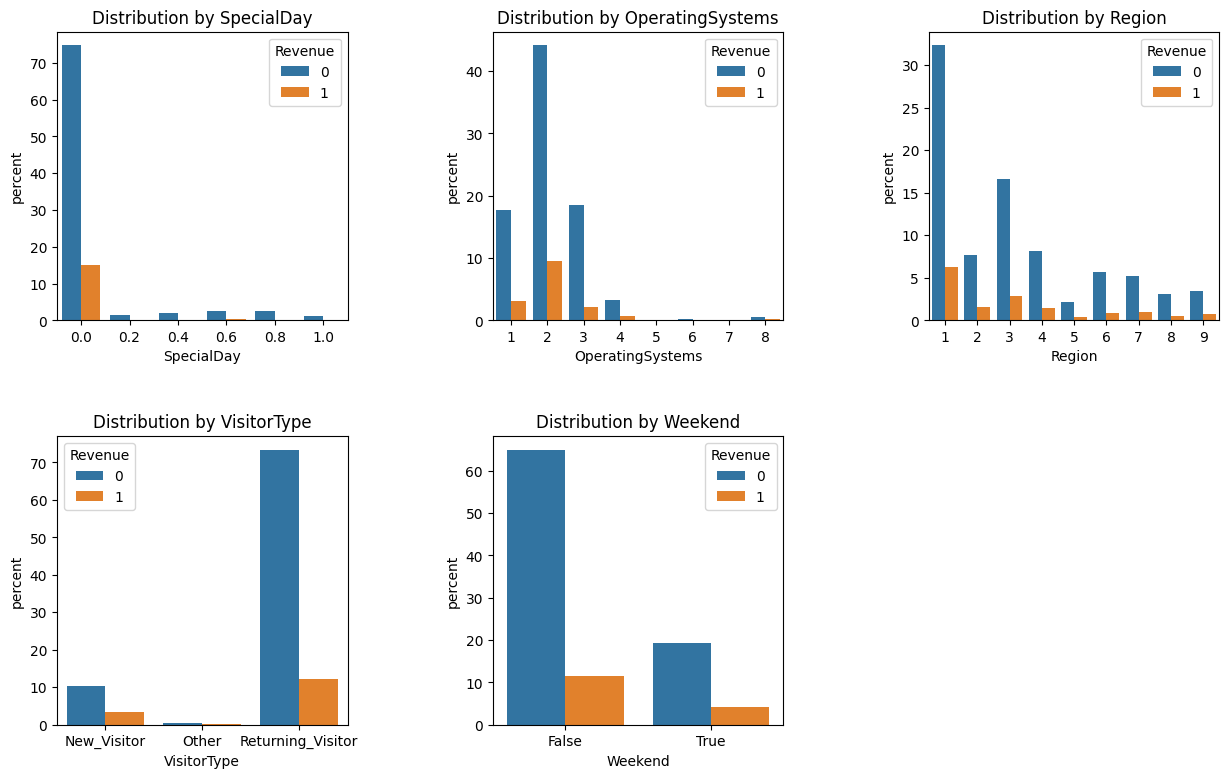

In [382]:
# Revenue Distribution

cols = ['SpecialDay', 'OperatingSystems',  'Region',  'VisitorType','Weekend']
plt.figure(figsize=(15,9))  # Set figure size

grid = plt.GridSpec(2, 3, wspace=0.5, hspace=0.4)  # Adjust spacing for readability

for i, col in enumerate(cols):
    ax = plt.subplot(grid[i])  # Use GridSpec for subplot positioning
    sns.countplot(x =df[col], stat= "percent", hue = df["Revenue"], ax=ax)  # Specify 'x' variable
    plt.title(f"Distribution by {col}", fontsize=12)

plt.tight_layout()  # Adjust layout to prevent overlapping subplots
plt.show()

#Correlation Analysis

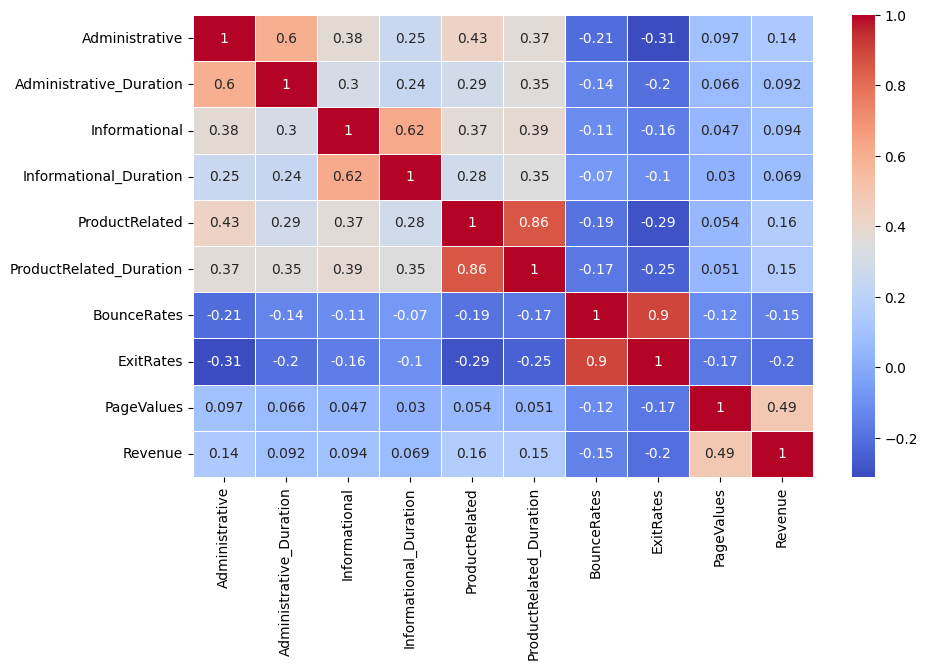

In [383]:
num_col = df.select_dtypes(include = ['int64', 'float64']) # define numerical columns

plt.figure(figsize = (10,6))
sns.heatmap(num_col.corr(), annot = True, linewidth = 0.5, cmap = 'coolwarm') # Heatmap of numerical columns
plt.show()

Insights:
1. Administrative & Administrative Duration:

  There is a strong positive correlation (0.60) between Administrative and Administrative_Duration. This indicates that as the number of administrative pages increases, the time spent on them also increases, which is intuitive.
2. Informational & Informational Duration:

  Similar to administrative pages, there is a strong correlation (0.62) between Informational and Informational_Duration, showing that more informational pages lead to more time spent.
3. ProductRelated & ProductRelated Duration:

  The correlation between ProductRelated and ProductRelated_Duration is extremely strong (0.86), suggesting that users visiting more product-related pages also spend significantly more time on them.
4. Bounce Rates & Exit Rates:

  There's a very high positive correlation (0.90) between BounceRates and ExitRates. This indicates that pages with high bounce rates often also have high exit rates, implying that users who leave quickly are likely doing so without further interaction.
5. Bounce Rates, Exit Rates & PageValues:

  Both BounceRates and ExitRates show a weak negative correlation with PageValues (-0.115 and -0.173 respectively). This means that pages with higher bounce and exit rates tend to have lower page values, which suggests that users leaving quickly are less likely to generate revenue.
6. Product-Related Pages & Revenue (PageValues):

  Interestingly, ProductRelated and ProductRelated_Duration have weak correlations (0.054 and 0.051) with PageValues, suggesting that while product-related pages are important, simply visiting or spending time on these pages does not guarantee revenue generation.
7. Administrative & Informational Pages and Revenue:

  Administrative and Informational pages have low to moderate correlations (0.097 and 0.047) with PageValues. This indicates that visiting these types of pages may have some impact on revenue generation, but it's not a major determinant.

## Total Duration for each page

In [384]:
page_col = df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']]

for col in page_col :
  print(f"Total duration of {col:<15} : {round(page_col[col].sum(),2)}")
  print()

Total duration of Administrative_Duration : 996493.47

Total duration of Informational_Duration : 425044.67

Total duration of ProductRelated_Duration : 14731220.89



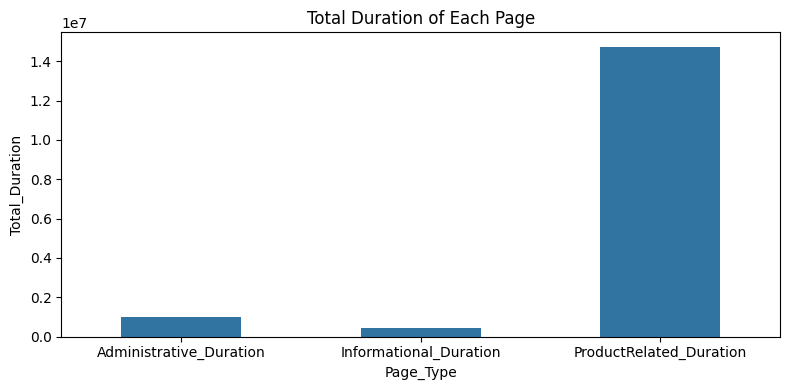

In [385]:
page_col = df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].sum().reset_index()
page_col.columns = ['Page_Type', 'Total_Duration']

plt.figure(figsize = (8,4))
sns.barplot(x = page_col['Page_Type'], y = page_col['Total_Duration'], width = 0.5)
plt.title('Total Duration of Each Page')

plt.tight_layout()  # Adjust layout to prevent overlapping subplots
plt.show()

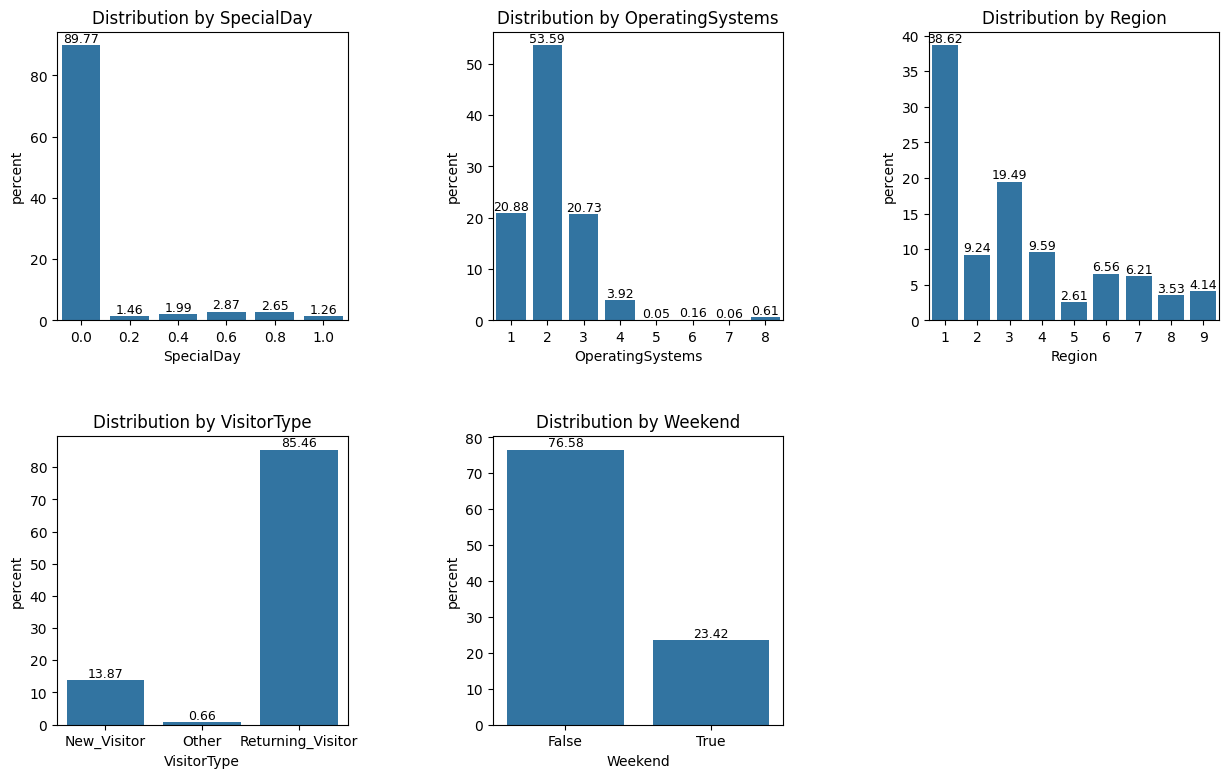

In [386]:
# Distribution by different columns

cols = ['SpecialDay', 'OperatingSystems',  'Region',  'VisitorType',       'Weekend']
plt.figure(figsize=(15,9))  # Set figure size

grid = plt.GridSpec(2, 3, wspace=0.5, hspace=0.4)  # Adjust spacing for readability

for i, col in enumerate(cols):
    ax = plt.subplot(grid[i])  # Use GridSpec for subplot positioning
    sns.countplot(x =df[col], stat= "percent", ax=ax)  # Specify 'x' variable
    ax.bar_label(ax.containers[0], fmt='%.2f',fontsize = 9)
    plt.title(f"Distribution by {col}", fontsize=12)

plt.tight_layout()  # Adjust layout to prevent overlapping subplots
plt.show()

Insights:

1. Distribution by SpecialDay:
 * The vast majority of user sessions occur on days that are not classified as "Special Days," with over 90% of the data falling into the 0.0 category. This suggests that special promotions or holidays are infrequent in this dataset, or they may not play a significant role in user sessions.
 * Another reason might be that people typically plan their gift purchases about 10 days before special occasions.
 * Most users interact with the platform on regular days, and special occasions have minimal influence on session behavior.
2. Distribution by OperatingSystems:
 *  The majority of users access the platform through Operating System 2 (over 50%) and Operating System 1 (around 25%). Other operating systems have much lower representation, with a steep decline in usage beyond OS 3.
 *  The platform is primarily used on a few dominant operating systems, and optimization efforts should focus on these OS environments.
3. Distribution by Region:
 *  Region 1 has the highest proportion of users (nearly 40%), followed by Region 3 and Region 4. Other regions have significantly lower representation, with a gradual decline as the region number increases.
 *  The user base is concentrated in a few key regions, indicating a potential geographic focus or market penetration. Efforts to expand the user base could target underrepresented regions.
4. Distribution by VisitorType:
 *  Returning visitors dominate the user base, with over 80% of sessions attributed to them. New visitors account for a small percentage, while the "Other" category is negligible.
 *  The platform's main audience consists of returning users, indicating a loyal user base. Efforts to attract new visitors could enhance growth.
5. Distribution by Weekend:
 * Most sessions take place during the weekdays, with only about 20% of sessions occurring over the weekend.
 *  The platform is more actively used during the workweek, and there may be opportunities to increase engagement on weekends with targeted strategies or promotions.

### Q - Class Distribution: Check the distribution of the target variable('Revenue') to understand class balance.


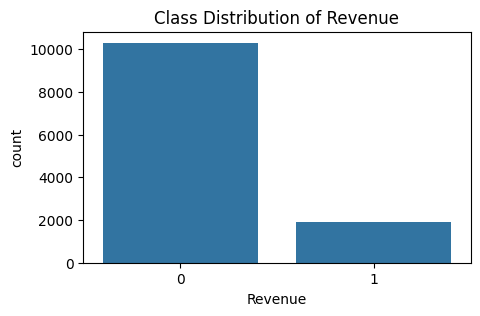

In [387]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Revenue', data=df)
plt.title('Class Distribution of Revenue')
plt.show()

### Q - Summarize page views, durations, and bounce/exit rates for each page category.


In [388]:
summary = pd.DataFrame({
    'PageCategory': ['Administrative', 'Informational', 'ProductRelated'],
    'Total_PageViews': [df['Administrative'].sum(), df['Informational'].sum(), df['ProductRelated'].sum()],
    'Average_Duration': [df['Administrative_Duration'].mean(), df['Informational_Duration'].mean(), df['ProductRelated_Duration'].mean()],
    'Average_BounceRate': [df['BounceRates'].mean(), df['BounceRates'].mean(), df['BounceRates'].mean()],
    'Average_ExitRate': [df['ExitRates'].mean(), df['ExitRates'].mean(), df['ExitRates'].mean()]
})

summary

,PageCategory,Total_PageViews,Average_Duration,Average_BounceRate,Average_ExitRate
0,Administrative,28546,81.646331,0.02037,0.041466
1,Informational,6209,34.825454,0.02037,0.041466
2,ProductRelated,391117,1206.982457,0.02037,0.041466


Insights :

1.  Page Popularity:

  * ProductRelated pages are the most visited with 391,117 total page views, indicating these pages attract the most user interest.

2.  Average Duration:

  * Users spend the most time on ProductRelated pages, with an average duration of 1206.98 seconds, suggesting high engagement with product-related content.
  * Administrative pages have a moderate average duration of 81.65 seconds.
  * Informational pages have the lowest average duration of 34.83 seconds.

3.  Bounce Rate:

  * The bounce rate is consistent across all page categories at 2.04%, indicating a similar likelihood of users leaving after viewing just one page, regardless of the page type.

4.  Exit Rate:

  * The exit rate is also uniform at 4.15% for all pages, suggesting that users exit the website at a similar rate, no matter which page they are on.

### Q - Analyze SpecialDay distribution and its correlation with Revenue.


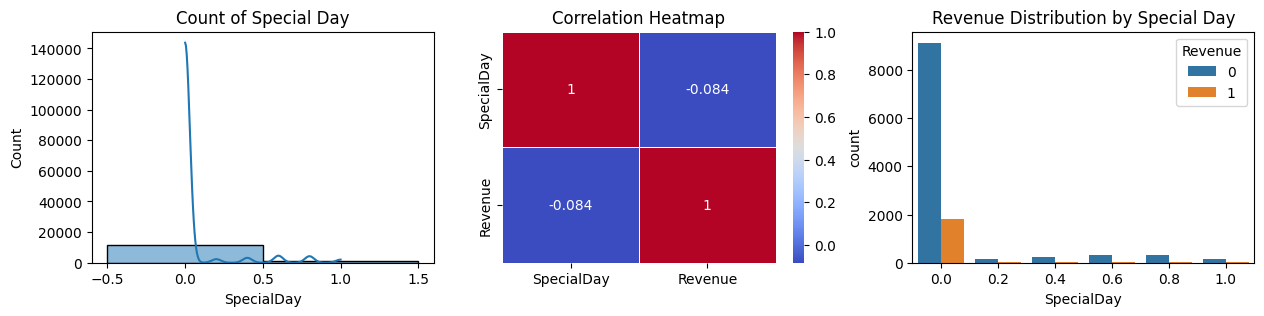

In [389]:
col_corr = df[['SpecialDay', 'Revenue']].corr()

fig, axes = plt.subplots(1,3, figsize = (15,3))
axes = axes.flatten()

sns.histplot(df['SpecialDay'], kde = True, bins = 20, ax = axes[0])
axes[0].set_title('Count of Special Day')

sns.heatmap(col_corr, linewidth = 0.5, annot = True, cmap = 'coolwarm', ax = axes[1])
axes[1].set_title('Correlation Heatmap')

sns.countplot(x = df["SpecialDay"], hue = df["Revenue"], ax = axes[2])
axes[2].set_title('Revenue Distribution by Special Day')

plt.show()

## Q - Generate a binary feature indicating whether the user visited all three page categories.


In [390]:
df['All_page_visited'] = ((df['Administrative']>0) & (df['Informational']>0) & (df['ProductRelated']>0)).astype(int)
df['All_page_visited'].value_counts().reset_index()

,All_page_visited,count
0,0,10038
1,1,2167


## Q - Explore PageValues distribution and its relationship with TrafficType, VisitorType, and Region

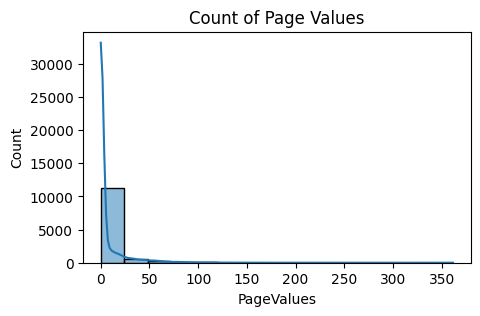

In [391]:
plt.figure(figsize = (5,3))
sns.histplot(df['PageValues'], kde = True)
plt.title('Count of Page Values')

plt.show()

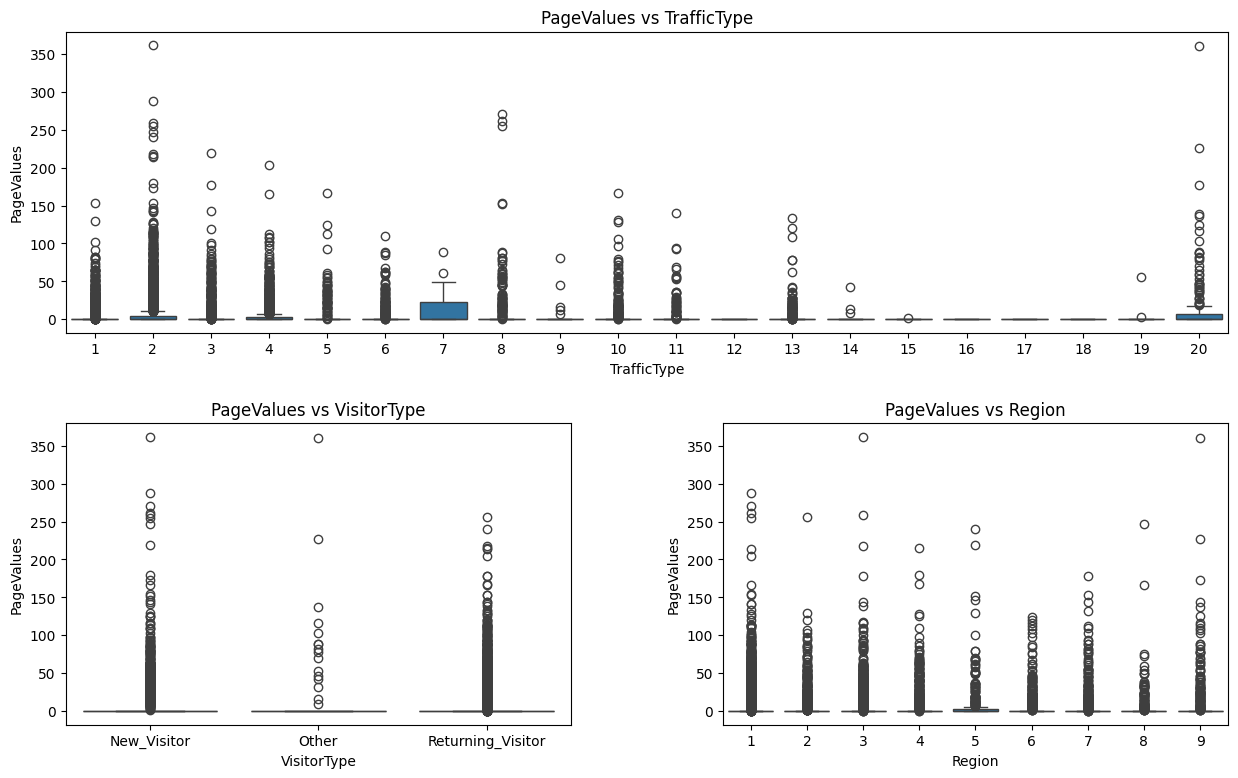

In [392]:
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
sns.boxplot(x = 'TrafficType', y = 'PageValues', data = df)
plt.title('PageValues vs TrafficType')

plt.subplot(2,2,3)
sns.boxplot(x = 'VisitorType', y = 'PageValues', data = df)
plt.title('PageValues vs VisitorType')

plt.subplot(2,2,4)
sns.boxplot(x = 'Region', y = 'PageValues', data = df)
plt.title('PageValues vs Region')

plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

plt.show()

1.  Distribution by Traffic Type
  * Top Traffic Types: Types 1, 2, and 3 are the most common, accounting for about 68% of all traffic.
  * Minor Traffic Types: Types 4 to 20 have lower percentages, with Type 13 showing a noticeable spike at 5.96%.
  * This indicates most of the traffic comes from a few specific types (likely key marketing channels), and the diversity in traffic types indicates various sources are being utilized to attract visitors.
2. Distribution by Browser
  * Browser Popularity: Browser 2 is the most used (64.59%), followed by Browser 1 (19.89%). The other browsers account for less than 6% individually.
  * The majority of users access the site using Browser 2, indicating a potential preference or compatibility that may be leveraged for optimization and marketing efforts.
3. Distribution by Month
  * Traffic Peaks: Traffic is highest in May (27.28%), November (24.43%), and December (13.98%).
  * The peaks in November and December might be associated with the holiday season (e.g., Black Friday, Christmas). The spike in May could be due to specific promotional events or holidays.

## Q - Investigate user session lengths and their impact on conversion rates.



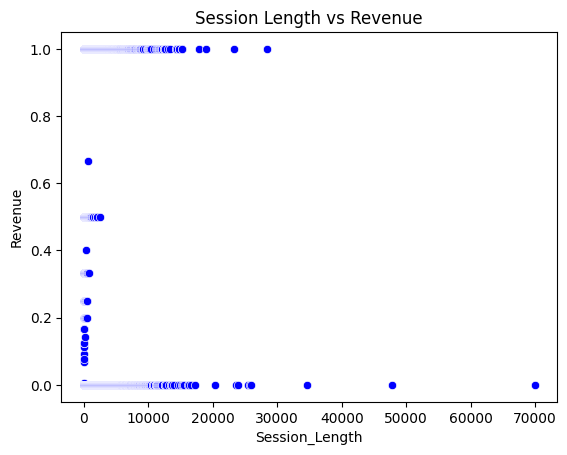

In [393]:
df['Session_Length'] = df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].sum(axis=1) # Total Session Duration

session_group_df = df.groupby('Session_Length')["Revenue"].agg('mean').reset_index() # Group by Session Length

sns.scatterplot(x = 'Session_Length', y = 'Revenue' , data = session_group_df, color = 'blue')
plt.title('Session Length vs Revenue')

plt.show()

Insgihts :

1.  Low Session Length Concentration:
  * The majority of sessions are short (below 10,000 seconds) with a large number of sessions resulting in either no revenue (0) or revenue (1). This suggests that shorter sessions are common and can lead to conversions.

2.  Sparse Data at High Session Lengths:
  * There are very few sessions with lengths beyond 20,000 seconds, and even fewer generate revenue. This implies that longer sessions do not significantly contribute to conversions.

3.  Bimodal Distribution:
  * The data shows a clear separation where most sessions either result in no revenue or full revenue, with very few cases in between.

4.  No Clear Correlation:
  * There isn’t a strong visible correlation between session length and revenue; revenue outcomes appear fairly consistent across varying session lengths.

## Q - Group users based on VisitorType, OperatingSystems, and Region to identify potential differences in behavior and conversion rates.


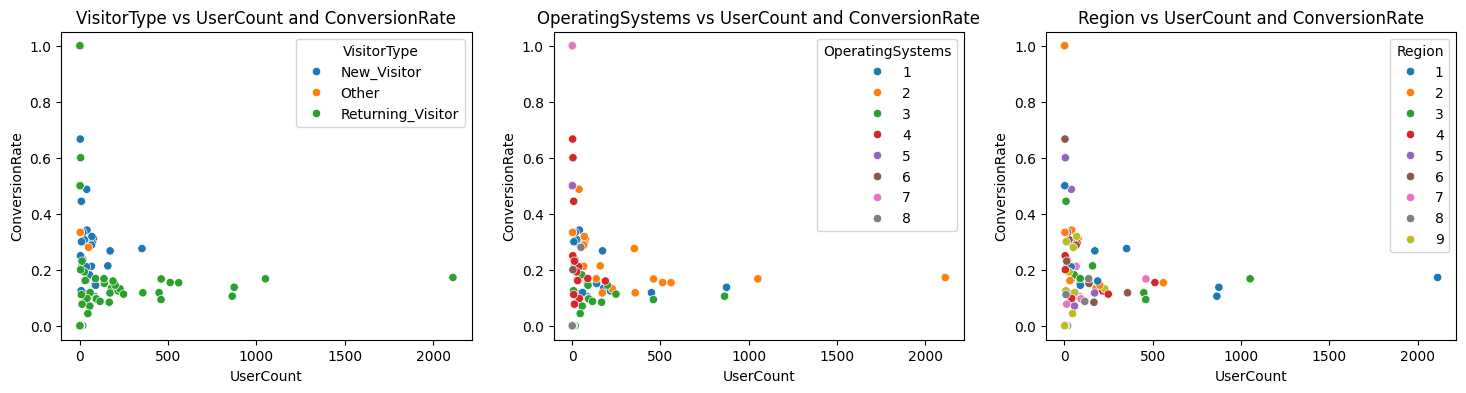

In [394]:
grouped_df = df.groupby(['VisitorType', 'OperatingSystems', 'Region'])['Revenue'].agg(['count', 'mean']).reset_index()

grouped_df.columns = ['VisitorType', 'OperatingSystems', 'Region', 'UserCount', 'ConversionRate']

plt.figure(figsize = (18,4))

plt.subplot(1,3,1)
sns.scatterplot(hue = 'VisitorType', y = 'ConversionRate', x = 'UserCount', data = grouped_df)
plt.title('VisitorType vs UserCount and ConversionRate')

plt.subplot(1,3,2)
sns.scatterplot(hue = 'OperatingSystems', y = 'ConversionRate', x = 'UserCount', data = grouped_df)
plt.title('OperatingSystems vs UserCount and ConversionRate')

plt.subplot(1,3,3)
sns.scatterplot(hue = 'Region', y = 'ConversionRate', x = 'UserCount', data = grouped_df)
plt.title('Region vs UserCount and ConversionRate')

plt.show()

1. Visitor Type vs User Count and Conversion Rate:
  * Returning Visitors:
    * The majority of returning visitors have a relatively low user count but exhibit a range of conversion rates, mostly concentrated below 0.4.
  * New Visitors:
    * New visitors have a broader spread in conversion rates, with some achieving high conversion rates, but their user counts are generally low.
  * Other Visitors:
    * This category has very few data points, but some of them have moderate conversion rates with low user counts.

2. Operating Systems vs User Count and Conversion Rate:
  * Operating System Diversity:
    * There is a spread of user counts across different operating systems.
    * Operating system 5 has outliers with high conversion rates despite low user counts.
  * Majority Concentration:
    * Most operating systems exhibit lower user counts and conversion rates under 0.4.
  * Outliers:
    * Some operating systems have exceptionally high conversion rates (close to 1) with very low user counts, indicating niche but highly effective sessions.

3. Region vs User Count and Conversion Rate:
  * Regional Spread:
    * Conversion rates are varied across different regions. Region 2 shows some of the highest conversion rates, even with low user counts.
  * Most Regions:
    * Most regions have lower user counts and conversion rates clustering below 0.4.
  * Outliers:
    * There are outliers in certain regions (like region 2) with high conversion rates despite low user counts.

* Low User Count, High Conversion Rate:
  * In all three charts, there are outliers with low user counts but very high conversion rates. These could represent specialized segments of users that are highly engaged or target a specific niche.

* Visitor Types:
  * Returning visitors seem to have more consistent conversion rates, while new visitors show more variability, indicating that while it might be harder to convert them, they can have higher potential.
  
* Operating Systems and Regions:
  * There are specific operating systems and regions where conversion rates are notably higher, suggesting that targeting these could potentially increase overall conversion rates.

## Q - Segment users based on TrafficType and analyze their engagement patterns and purchase probability.


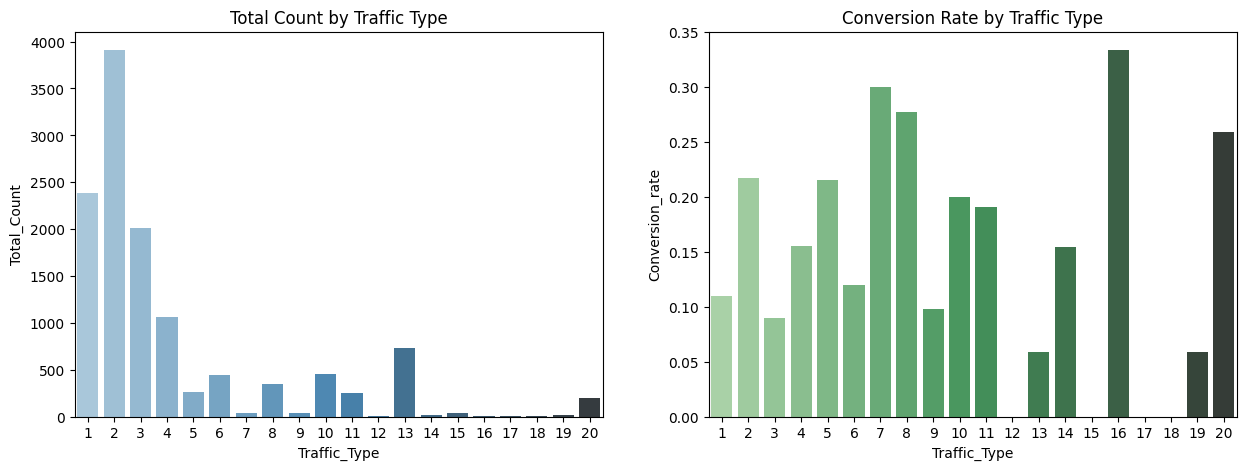

In [395]:
traffic_group = df.groupby('TrafficType')['Revenue'].agg(['count', 'mean']).reset_index()
traffic_group.columns = ['Traffic_Type', 'Total_Count', 'Conversion_rate']

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.barplot(x = 'Traffic_Type', y = 'Total_Count', data = traffic_group, palette='Blues_d', order=traffic_group['Traffic_Type'])
plt.title('Total Count by Traffic Type')

plt.subplot(1,2,2)
sns.barplot(x = 'Traffic_Type', y = 'Conversion_rate', data = traffic_group, palette='Greens_d', order=traffic_group['Traffic_Type'])
plt.title('Conversion Rate by Traffic Type')

plt.show()

###Insights and Recommendations
1. Administrative & Administrative Duration:
    * Insight: Users visited an average of 2.34 administrative pages per session, but this varies significantly. Time spent on these pages averages 81.65 seconds, with the maximum duration extending to about 56 minutes.
    * Recommendation: Administrative pages are essential for specific functions, but the low engagement suggests they may not be critical to most user sessions. Streamlining the administrative experience could improve user flow without disrupting overall engagement.

2. Informational & Informational Duration
    * Insight: Informational pages are visited less frequently, averaging 0.51 pages per session, and time spent on them is relatively low (34.83 seconds on average). However, some sessions extend to 42 minutes.
    * Recommendation: Improve the accessibility of key information to minimize excessive time spent on informational pages, which may be causing friction for some users. Ensure essential information is concise and easy to find.

3. Product-Related & Product-Related Duration
    * Insight: Product-related pages have the highest interaction, with an average of 32 pages per session. Time spent on these pages is also significantly higher (20 minutes on average), with outliers indicating sessions that last for hours.
    * Recommendation: Optimize the product pages for better user engagement and faster conversions. Since users spend more time here, ensure the layout, loading speed, and product details are top-notch to enhance user satisfaction and drive conversions.

4. Bounce Rates & Exit Rates
    * Insight: The average bounce rate is low (2.04%), indicating that users generally interact beyond the first page. Exit rates average 4.15%, but certain pages experience exit rates as high as 20%.
    * Recommendation: Review pages with high exit rates to identify areas of improvement. These could be poorly optimized pages or dead-ends in the user flow. Optimizing them could help keep users on the site longer and improve conversion rates.

5. Page Values
    * Insight: The average page value is 5.95, but most sessions result in 0 page value, indicating that half of the sessions do not lead to revenue. The maximum page value reaches 361.76, showing the potential for high-value transactions.
    * Recommendation: Focus on improving conversion rates for lower-value sessions by identifying bottlenecks in the user journey. Enhance the user experience on high-traffic but low-conversion pages to increase the likelihood of generating revenue.

6. Correlation Between Session Features and Engagement
    * Insight: Strong correlations exist between the number of pages visited and the time spent on them (e.g., 0.86 correlation between product-related pages and their duration). However, visiting more pages does not always translate into higher revenue, as indicated by the weak correlations with page values.
    * Recommendation: Rather than simply encouraging more page views, focus on the quality of user interaction. Implement features like personalized recommendations or streamlined product discovery to encourage meaningful engagement and faster purchasing decisions.

7. Traffic Source Analysis
    * Insight: Traffic Type 2 has the highest session count and the potential for high revenue, while Types 7 and 20, though fewer in sessions, have higher average revenue per session.
    * Recommendation: Prioritize high-performing traffic sources (e.g., Traffic Types 7 and 20) by doubling down on marketing efforts targeting those channels. At the same time, analyze the low-revenue traffic types (e.g., Types 12, 16, 17, and 18) to improve their performance or allocate resources elsewhere.

8. Visitor Type Breakdown
    * Insight: Returning visitors make up the majority of sessions but show lower average page values compared to new visitors, who, although fewer, have higher average revenue potential.
    * Recommendation: Design campaigns that specifically target returning visitors with personalized offers or incentives to increase their engagement. For new visitors, capitalize on their higher likelihood of conversion with effective onboarding and targeted promotions.

9. Geographic Analysis
    * Insight: Region 1 dominates the user base but shows an average page value with high variability. Regions like Region 9, despite having fewer sessions, show higher average page values, indicating more engaged or high-value users.
    * Recommendation: Focus marketing efforts on regions with high engagement and revenue potential (e.g., Region 9). Additionally, analyze regions with lower average page values (e.g., Regions 2, 6, 7, and 8) to identify and address barriers to conversion.

10. Outlier Analysis
    * Insight: Across all session features (Administrative, Informational, Product-related pages), there are notable outliers where some sessions exhibit significantly higher engagement (in terms of page visits and duration) than others.
    * Recommendation: Investigate the characteristics of these outlier sessions to determine if they represent particularly engaged or frustrated users. If they indicate frustration, reduce friction points; if they represent highly engaged users, consider how to replicate that experience across more sessions.

11. Special Days and User Behavior
    * Insight: Over 90% of user sessions occur on non-special days, indicating that special occasions don’t significantly impact user sessions.
    * Recommendation: Implement targeted marketing campaigns for special days to boost engagement and conversions, especially around key holidays or promotional events where there is an opportunity to attract more traffic.

12. Device and Browser Optimization
    * Insight: The majority of users access the platform using Operating System 2 (over 50%) and Browser 2 (64.59%). Other operating systems and browsers are less frequently used.
    * Recommendation: Focus platform optimization efforts on the most commonly used OS and browsers to ensure a smooth user experience. Additionally, assess performance on less-used systems to ensure there are no critical issues that deter users from engaging.

13. Weekend vs. Weekday Behavior
    * Insight: Most sessions occur during the weekdays, but weekend sessions show a slightly higher conversion rate.
    * Recommendation: Implement weekend-specific promotions or strategies to capitalize on the higher conversion potential. This could include flash sales, limited-time offers, or special incentives designed to drive purchases over the weekend.

14. Conversion Rates by Traffic Type and Region
    * Insight: Traffic Types 7 and 8 have the highest revenue rates, while certain regions like Region 9 show the highest conversion rates.
    * Recommendation: Focus conversion optimization efforts on these high-performing traffic sources and regions. Tailor marketing efforts to replicate successful strategies in lower-conversion areas, increasing revenue generation potential across the board.

15. Bounce and Exit Rate Reduction Strategies
    * Insight: High bounce and exit rates are more prevalent on product-related pages, indicating that users may be leaving after browsing too many products without converting.
    * Recommendation: Simplify the product browsing process by incorporating features like better filtering, faster load times, or personalized recommendations to reduce friction and encourage conversions before users bounce or exit.


## Conclusion:
The data highlights significant opportunities for improving user engagement and conversion rates. By focusing on optimizing the user experience on high-interaction pages (like product-related pages), targeting high-revenue traffic types and regions, and reducing friction in areas with high bounce or exit rates, the platform can increase overall revenue. Additionally, addressing underperforming visitor types and enhancing engagement during special promotions or weekends could further drive conversions.